In [1]:
import sys
# adding search_optimization_tools to the system path
sys.path.insert(0, '../')

In [2]:
import latexify
import random
import math
import numpy as np
from search_optimization_tools.algorithms import SimulatedAnnealing
from search_optimization_tools.problems import ProblemBase, ContinuousFunctionBase

In [3]:
@latexify.with_latex
def simple_example(x):
    return (x-6)**2

simple_example_bounds = np.asarray([[0, 31]])
simple_example_obj = ContinuousFunctionBase(simple_example, simple_example_bounds)
simple_example

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x1757aadc6a0>

In [4]:
# Adding debug = 1 to print initial and final solution
sa = SimulatedAnnealing(max_iter=1000, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9, debug=1)

In [5]:
sa.run(simple_example_obj)

Simulated annealing is initialized:
current value = 117.76993364824669, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 5.519102054722393e-09, curr temp:9.97938882337113e-05, curr best: sol: [6.00007429]


In [6]:
# Adding debug=2 (debug>1) for hand iteration tracing
sa_hand_iter = SimulatedAnnealing(max_iter=100, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9, debug=2)

In [7]:
sa_hand_iter.run(simple_example_obj)

Simulated annealing is initialized:
current value = 184.47633027021433, current temp=1000
curr iter: 1, curr value: 168.87095624649288, curr best value: 0.06646227280751331, curr temp:1000, curr best: sol: [5.74219722]
curr iter: 2, curr value: 40.69873376747253, curr best value: 0.06646227280751331, curr temp:900.0, curr best: sol: [5.74219722]
curr iter: 3, curr value: 326.8528999703066, curr best value: 0.06646227280751331, curr temp:810.0, curr best: sol: [5.74219722]
curr iter: 4, curr value: 543.6108005612571, curr best value: 0.06646227280751331, curr temp:729.0000000000001, curr best: sol: [5.74219722]
curr iter: 5, curr value: 137.68910091094946, curr best value: 0.00013845484998264984, curr temp:656.1, curr best: sol: [5.98823332]
curr iter: 6, curr value: 362.13001220885167, curr best value: 0.00013845484998264984, curr temp:590.4900000000001, curr best: sol: [5.98823332]
curr iter: 7, curr value: 442.0161334859682, curr best value: 0.00013845484998264984, curr temp:531.441,

global minimum: x = 6.0001, f(x) = 0.0000


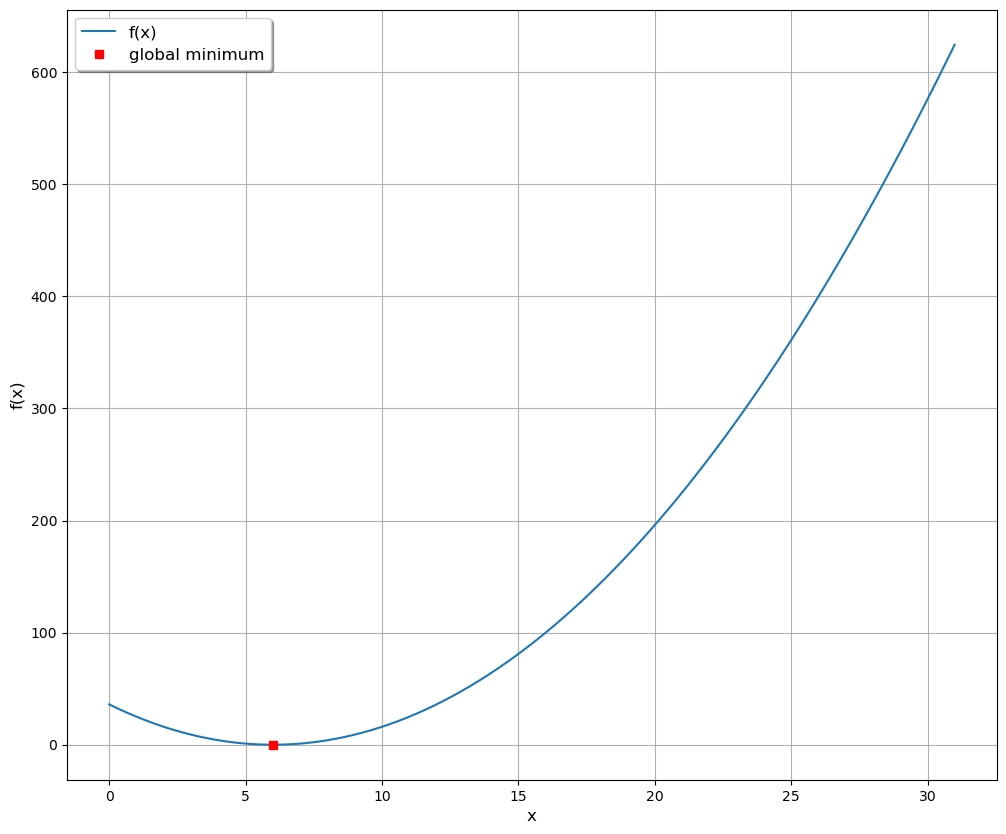

In [8]:
simple_example_obj.plot(sa_hand_iter.s_best)

In [9]:
def Bohachevsky(x_1, x_2):
    return x_1**2 +2*(x_2**2)-0.3*np.cos(3*np.pi*x_1)-0.4*np.cos(4*np.pi*x_2)+0.7

Bohachevsky_bounds = np.asarray([[-100, 100], [-100, 100]])
Bohachevsky_obj = ContinuousFunctionBase(Bohachevsky, Bohachevsky_bounds, 5)

In [10]:
sa.run(Bohachevsky_obj)

Simulated annealing is initialized:
current value = 21912.765844682235, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 0.4205435874912772, curr temp:9.97938882337113e-05, curr best: sol: [-0.59914622  0.00921016]


global minimum: x = -0.5991, 0.0092, f(x) = 0.4205


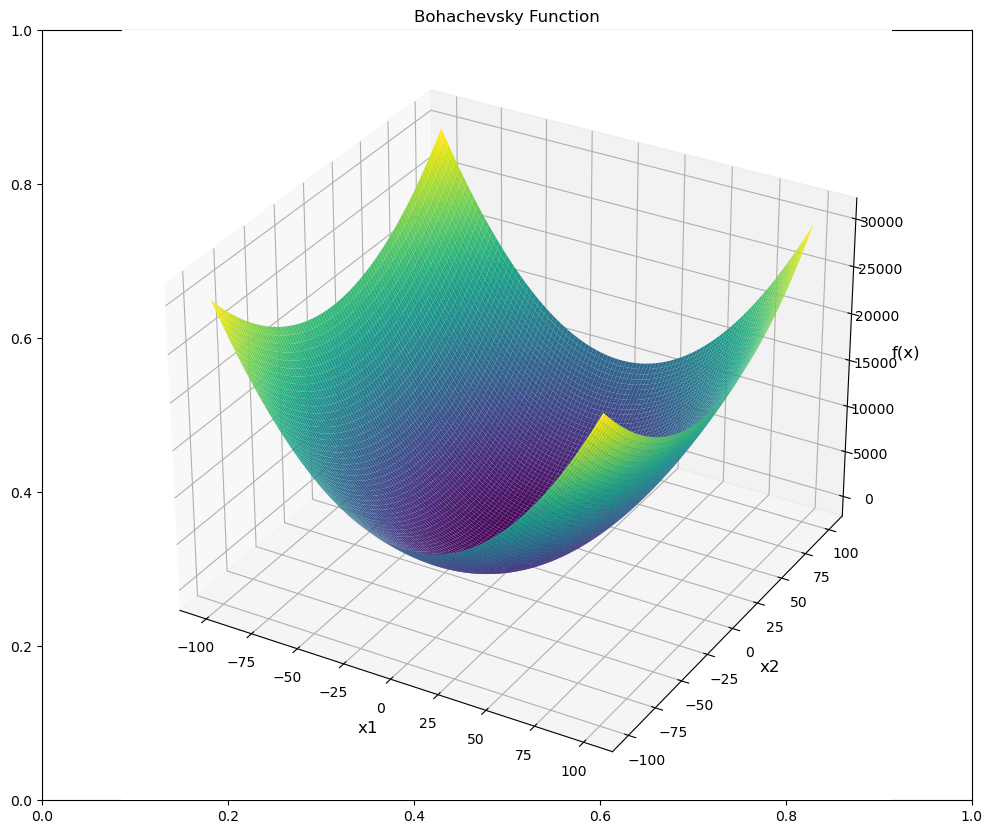

In [11]:
Bohachevsky_obj.plot(sa.s_best,'Bohachevsky Function')

In [12]:
@latexify.with_latex
def bukin(x_1, x_2):
    return 100*math.sqrt(abs(x_2-0.01*x_1**2)) + 0.01 * abs(x_1 + 10)

bukin_bounds = np.asarray([[-15, -5], [-3, 3]])
bukin_obj = ContinuousFunctionBase(bukin, bukin_bounds, 5)
bukin

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x1757d905e10>

In [13]:
sa.run(bukin_obj)

Simulated annealing is initialized:
current value = 99.10270099957881, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 2.1541196130492026, curr temp:9.97938882337113e-05, curr best: sol: [-7.89094734  0.62221552]


global minimum: x = -7.8909, 0.6222, f(x) = 2.1541


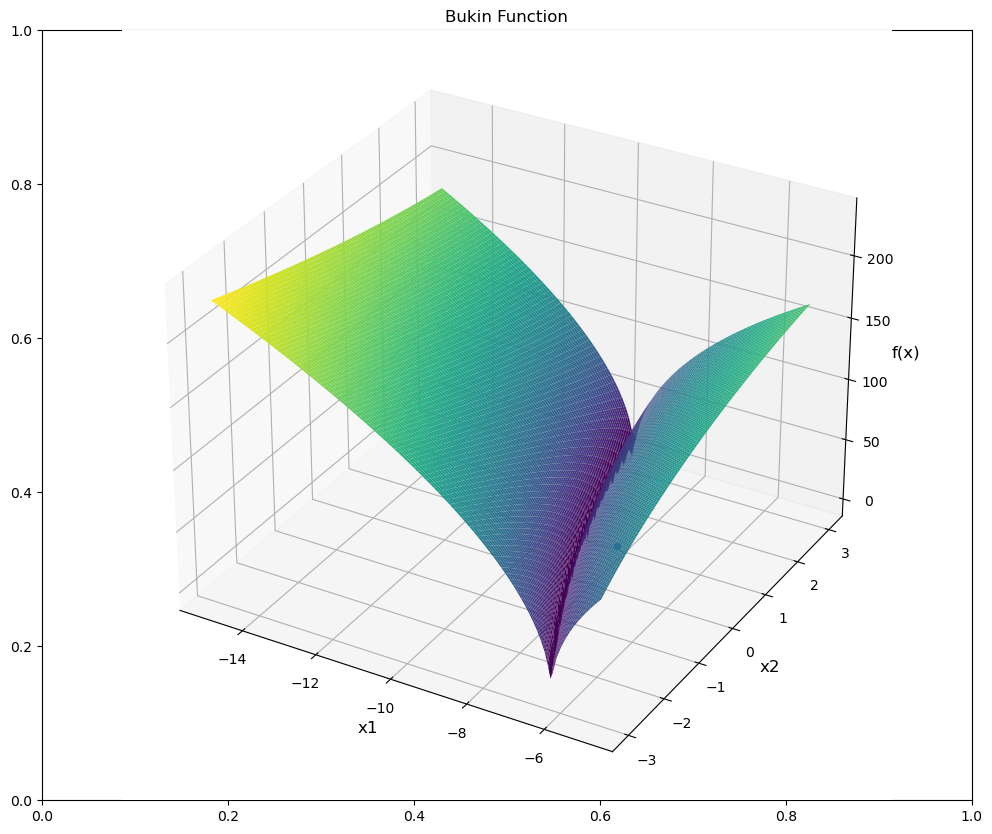

In [14]:
bukin_obj.plot(sa.s_best,'Bukin Function')

In [15]:
pi = math.pi
@latexify.with_latex
def gramacy_and_lee(x):
    return math.sin(10*pi*x)/(2*x) + (x-1)**4

gramacy_and_lee_bounds = np.asarray([[0.5, 2.5]])
gramacy_and_lee_obj = ContinuousFunctionBase(gramacy_and_lee, gramacy_and_lee_bounds, .1)
gramacy_and_lee

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x1757b3f8280>

In [16]:
sa.run(gramacy_and_lee_obj)

Simulated annealing is initialized:
current value = -0.28548617222619965, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: -0.8690111312012451, curr temp:9.97938882337113e-05, curr best: sol: [0.54856635]


global minimum: x = 0.5486, f(x) = -0.8690


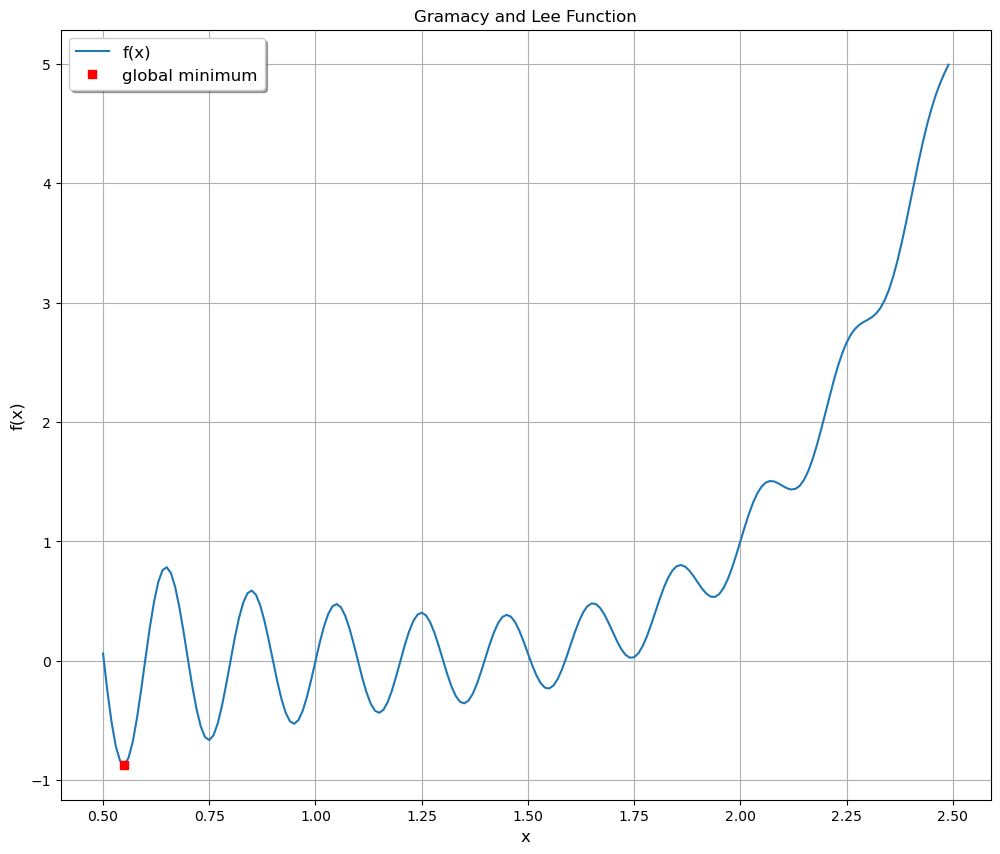

In [17]:
gramacy_and_lee_obj.plot(sa.s_best,'Gramacy and Lee Function')

In [18]:
def griewank(*x):
    x = np.asarray(x)
    return np.sum(x**2/4000) - np.prod(np.cos(x/np.sqrt(np.asarray(range(1, len(x)+1))))) + 1

griewank_bounds = np.asarray([[-600, 600]])
griewank_1d=ContinuousFunctionBase(griewank, griewank_bounds, 10)

In [19]:
sa.run(griewank_1d)

Simulated annealing is initialized:
current value = 81.69513723045579, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 2.391294062764615e-07, curr temp:9.97938882337113e-05, curr best: sol: [-0.00069139]


global minimum: x = -0.0007, f(x) = 0.0000


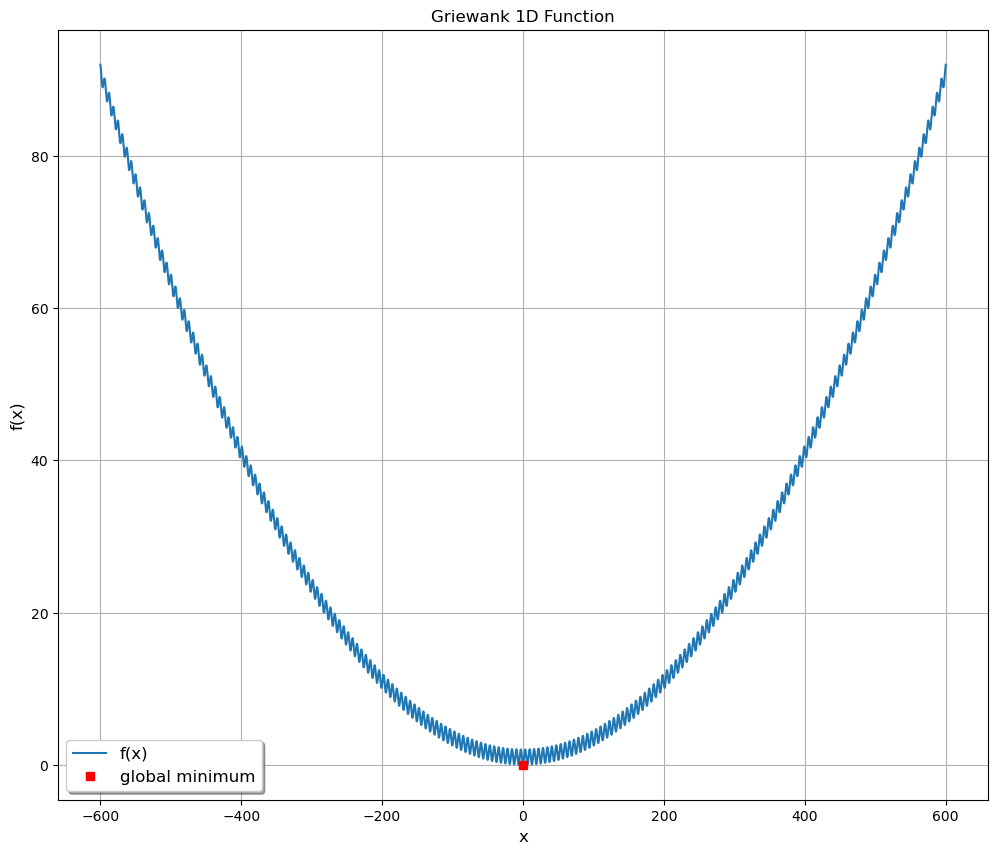

In [20]:
griewank_1d.plot(sa.s_best,'Griewank 1D Function')

In [21]:
griewank_bounds_2d = np.asarray([[-600, 600]]*2)
griewank_2d=ContinuousFunctionBase(griewank, griewank_bounds_2d, (griewank_bounds_2d[:, 1] - griewank_bounds_2d[:, 0])/10)

In [22]:
sa.run(griewank_2d)

Simulated annealing is initialized:
current value = 1.9485320373628172, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 0.03808165680957076, curr temp:9.97938882337113e-05, curr best: sol: [ 6.05611053 -0.11533413]


global minimum: x = 6.0561, -0.1153, f(x) = 0.0381


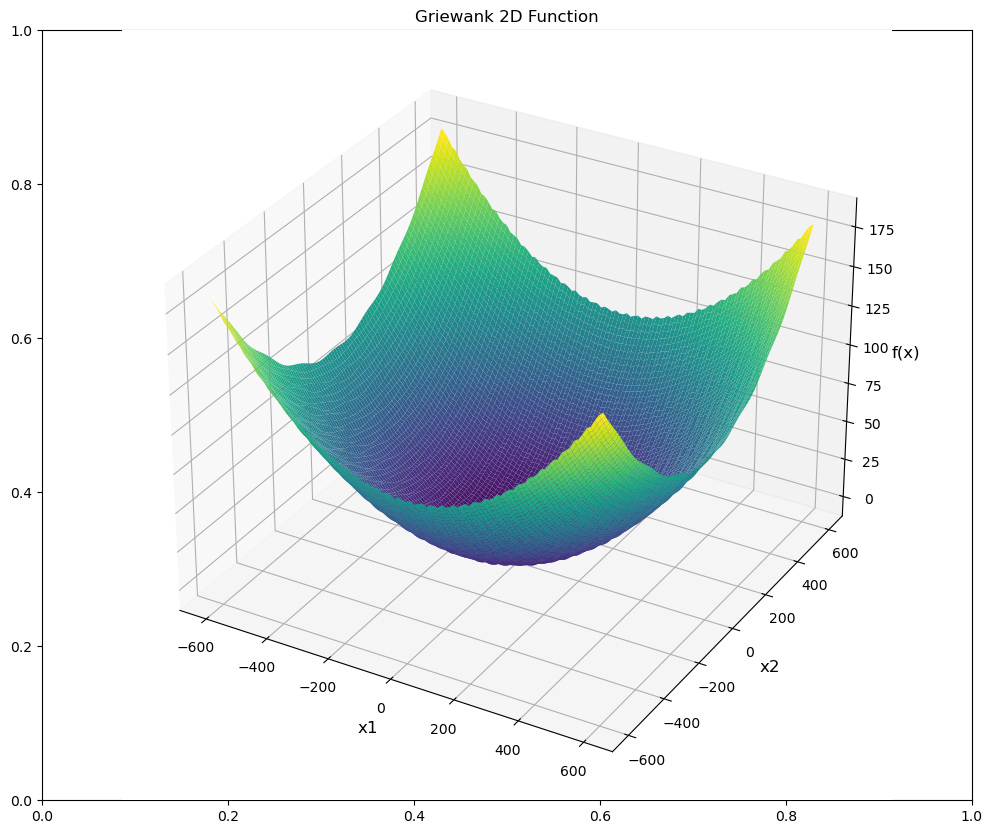

In [23]:
griewank_2d.plot(sa.s_best,'Griewank 2D Function')

In [24]:
griewank_bounds_3d = np.asarray([[-600, 600]]*3)
griewank_3d=ContinuousFunctionBase(griewank, griewank_bounds_3d, (griewank_bounds_3d[:, 1] - griewank_bounds_3d[:, 0])/10)

In [25]:
# Changing the parameters for SA for more complex problem
sa = SimulatedAnnealing(max_iter=10000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.0000001, cooling_schedule='linear_inverse', cooling_alpha=0.9, debug=1)

In [ ]:
sa.run(griewank_3d)

Simulated annealing is initialized:
current value = 103.98636040665579, current temp=10000
